In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split ,GridSearchCV

from sklearn.neighbors import KNeighborsRegressor


import warnings
warnings.filterwarnings('ignore')



from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score


# 1. Problem Statement

In [ ]:
Predict Car price

# 2. Data Gathering

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')
df=df.drop(['car_ID','symboling','CarName'],axis=1)
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# 3. EDA + Feature Engineering

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [3]:
int_df=df.select_dtypes(exclude=object)
int_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


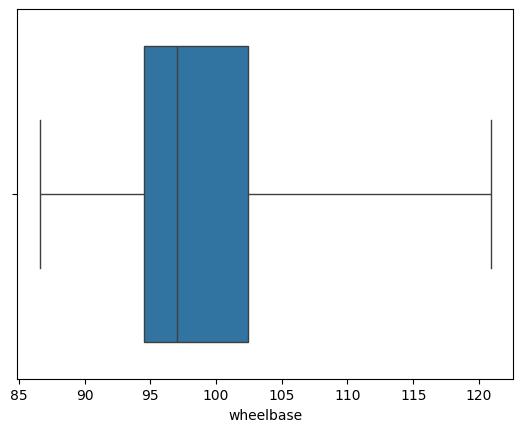

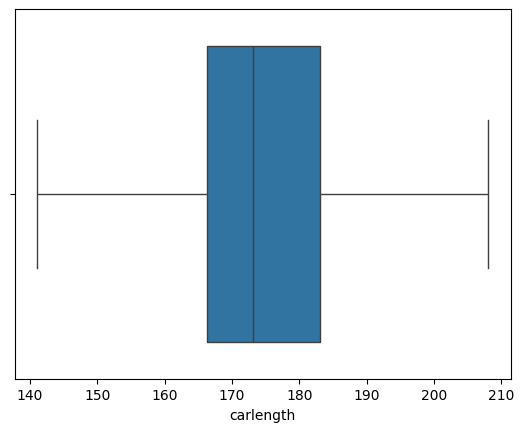

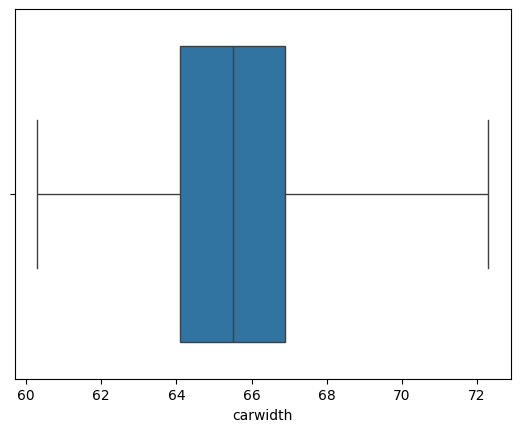

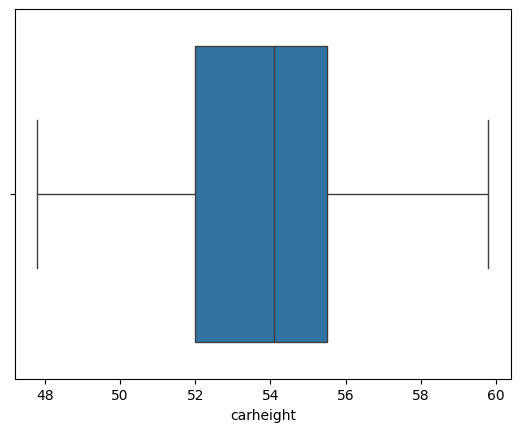

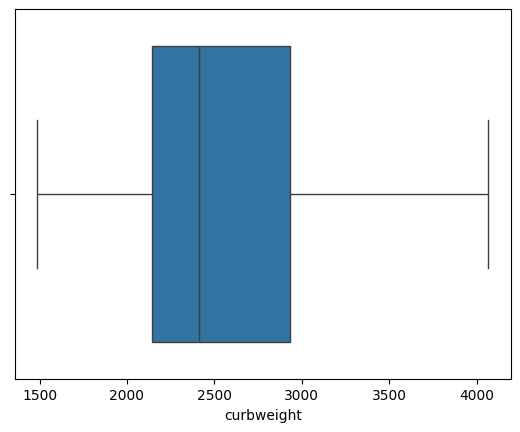

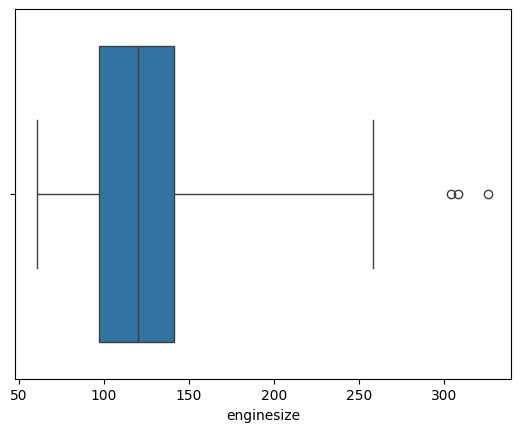

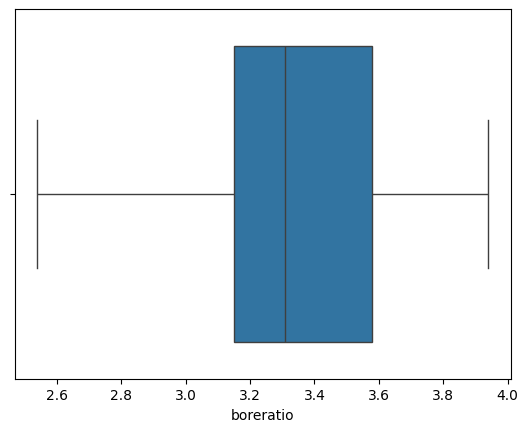

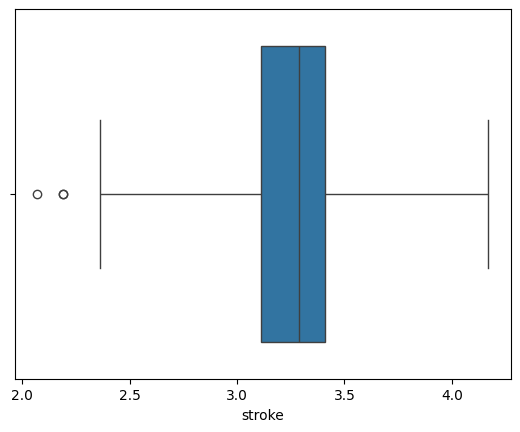

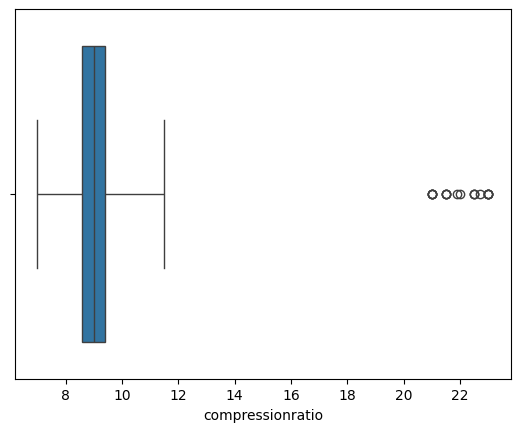

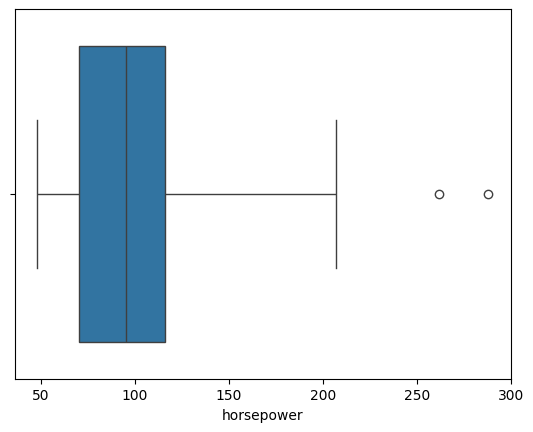

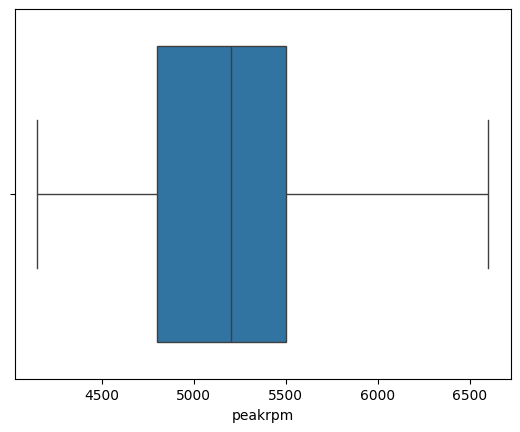

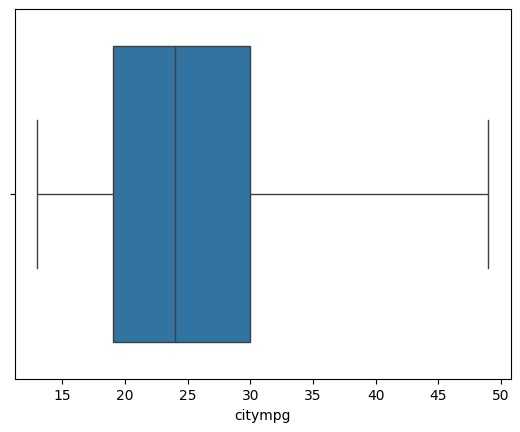

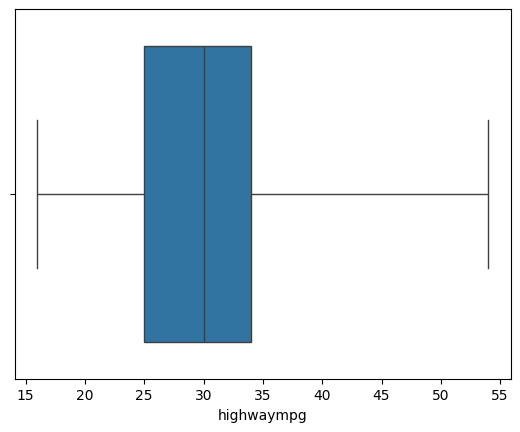

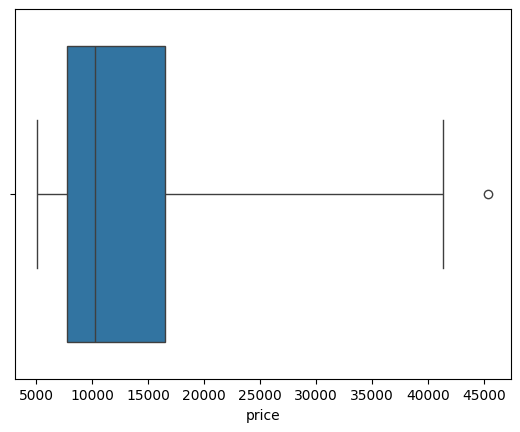

In [65]:
for i in int_df.columns:
    sns.boxplot(x=int_df[i],whis=3)
    plt.show()

In [4]:
obj_df=df.select_dtypes(include=object)
obj_df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### One label encoding

In [5]:
df['fueltype'].value_counts()
df['fueltype'].replace({'gas':1,'diesel':0},inplace=True)

In [6]:
df['aspiration'].value_counts()
df['aspiration'].replace({'std':1,'turbo':0},inplace=True)

In [7]:
df['doornumber'].value_counts()
df['doornumber'].replace({'four':1,'two':0},inplace=True)

In [8]:
df['enginelocation'].value_counts()
df['enginelocation'].replace({'front':0,'rear':1},inplace=True)

In [9]:
df['cylindernumber'].value_counts()
df['cylindernumber'].replace({'two':0,'three':1,'four':2,'five':3,'six':4,'eight':5,'twelve':6},inplace=True)


In [ ]:
data={"fueltype":{'gas':1,'diesel':0},
      'aspiration':{'std':1,'turbo':0},
     'doornumber':{'four':1,'two':0},
     'enginelocation':{'front':0,'rear':1},
     'cylindernumber':{'two':0,'three':1,'four':2,'five':3,'six':4,'eight':5,'twelve':6}}

In [12]:
obj_df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [13]:
obj_df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [14]:
obj_df['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [15]:
obj_df['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [16]:
obj_df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [18]:
obj_df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [10]:
obj_df=df.select_dtypes(include=object)
obj_df.head()

,carbody,drivewheel,enginetype,fuelsystem
0,convertible,rwd,dohc,mpfi
1,convertible,rwd,dohc,mpfi
2,hatchback,rwd,ohcv,mpfi
3,sedan,fwd,ohc,mpfi
4,sedan,4wd,ohc,mpfi


## One Hot Encoding

In [7]:
final_df=pd.get_dummies(df ,columns=obj_df.columns,dtype=int)
final_df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [12]:
final_df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

# 4. Feature Selection

## 5. Model training

In [8]:
x=final_df.drop('price',axis=1)
y=final_df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.2)


In [30]:
knn_model=KNeighborsRegressor(n_neighbors=2,p=2)
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

# 6. Evaluation

## Evaluation on train dataset

In [31]:
y_pred_train=knn_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train,y_pred_train)
print('Square root of MSE is :',rmse)
print('MAE :',mae)
print('Accuracy on train :',r2_score(y_train,y_pred_train))


Square root of MSE is : 1720.1977248986361
MAE : 1129.2134115853657
Accuracy on train : 0.9557113287288802


### Evaluation on test dataset

In [32]:
y_pred_test=knn_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_test)
print('Square root of MSE is :',rmse)
print('MAE :',mae)
print('Accuracy on test :',r2_score(y_test,y_pred_test))

Square root of MSE is : 2049.5777599062785
MAE : 1369.2560975609756
Accuracy on test : 0.9115702306201967


# Find Best k value 

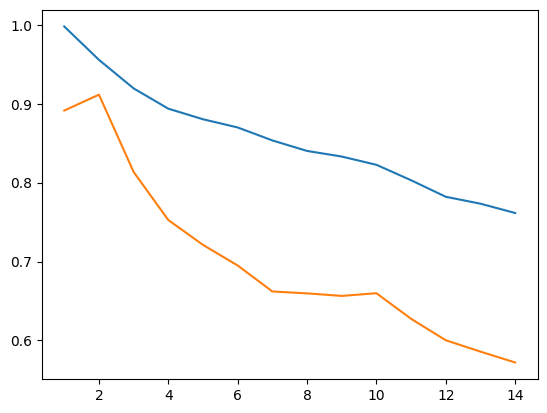

In [29]:

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.2)
train_acc , test_acc=[],[]
k_value=range(1,15)

for k in k_value:
    knn_model=KNeighborsRegressor(n_neighbors=k , p=2)
    knn_model.fit(x_train,y_train)
    train_acc.append(knn_model.score(x_train,y_train))
    test_acc.append(knn_model.score(x_test,y_test))

plt.plot(k_value , train_acc)
plt.plot(k_value,test_acc)

# BY Standard Scaling

In [9]:
std_model=StandardScaler()
array=std_model.fit_transform(x)
std_x=pd.DataFrame(array , columns =x.columns)
std_x.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,-0.070014,-0.141069,-0.23812,-0.689072,-0.121867,-0.328798,-0.070014,1.08667,-0.214286,-0.070014


In [16]:
x_train,x_test,y_train,y_test=train_test_split(std_x,y,random_state=12,test_size=0.2)

knn_model=KNeighborsRegressor(n_neighbors=2, p=1)
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2, p=1)

In [17]:
y_pred_train=knn_model.predict(x_train)
mse=mean_squared_error(y_train,y_pred_train)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_train,y_pred_train)
print('Square root of MSE is :',rmse)
print('MAE :',mae)
print('Accuracy on train :',r2_score(y_train,y_pred_train))


Square root of MSE is : 1504.4153133481514
MAE : 979.0477652439025
Accuracy on train : 0.9661256161898425


In [18]:
y_pred_test=knn_model.predict(x_test)
mse=mean_squared_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred_test)
print('Square root of MSE is :',rmse)
print('MAE :',mae)
print('Accuracy on test :',r2_score(y_test,y_pred_test))

Square root of MSE is : 2067.193891575208
MAE : 1465.6829268292684
Accuracy on test : 0.9100435892796529


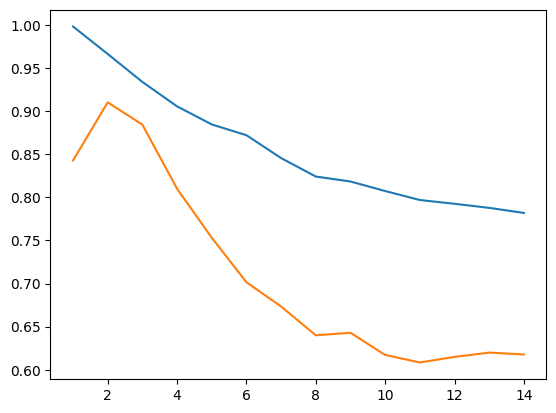

In [43]:

x_train,x_test,y_train,y_test=train_test_split(std_x,y,random_state=12,test_size=0.2)
train_acc , test_acc=[],[]
k_value=range(1,15)

for k in k_value:
    knn_model=KNeighborsRegressor(n_neighbors=k , p=1)
    knn_model.fit(x_train,y_train)
    train_acc.append(knn_model.score(x_train,y_train))
    test_acc.append(knn_model.score(x_test,y_test))

plt.plot(k_value , train_acc)
plt.plot(k_value,test_acc)

In [10]:
import pickle
import json

In [21]:
with open('car_knn.pkl','wb') as f:
    pickle.dump(knn_model,f)

In [11]:
with open('std_scale_model.pkl','wb') as f:
    pickle.dump(std_model,f)

In [23]:

data={"fueltype":{'gas':1,'diesel':0},
      'aspiration':{'std':1,'turbo':0},
     'doornumber':{'four':1,'two':0},
     'enginelocation':{'front':0,'rear':1},
     'cylindernumber':{'two':0,'three':1,'four':2,'five':3,'six':4,'eight':5,'twelve':6}}
with open('encoding_data.json','w') as f:
    json.dump(data,f)

In [26]:
knn_model.feature_names_in_

array(['fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype=object)

In [27]:
fueltype='gas'
data['fueltype'][fueltype]

1